In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [5]:
df.drop(['id','Product ID'],axis=1,inplace=True)

In [6]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]


In [7]:
filtered_df = df[(df[target_col] == 1) & (df[binary_cols].sum(axis=1) == 0)]

d_columns = binary_cols + [target_col]
filtered_df = filtered_df[d_columns]

filtered_df

,TWF,HDF,PWF,OSF,RNF,Machine failure
130,0,0,0,0,0,1
228,0,0,0,0,0,1
888,0,0,0,0,0,1
1518,0,0,0,0,0,1
1806,0,0,0,0,0,1
...,...,...,...,...,...,...
134865,0,0,0,0,0,1
134955,0,0,0,0,0,1
135097,0,0,0,0,0,1
135570,0,0,0,0,0,1


In [8]:
one_hot_type = pd.get_dummies(df["Type"])

In [9]:
df.drop(['Type'],axis=1,inplace=True)

In [10]:
df = pd.concat([df,one_hot_type],axis=1)

In [11]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0,0,1
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1,0,0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,0,1,0
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,0,1,0


<AxesSubplot:ylabel='Machine failure'>

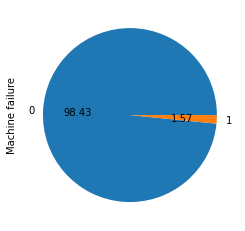

In [12]:
df[target_col].value_counts().plot(kind='pie',autopct='%.2f')

In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
df.shape

(135273, 14)

In [15]:
df[target_col].value_counts()

0    133144
1      2129
Name: Machine failure, dtype: int64

In [16]:
#Temp Difference
df['Temp Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
#Power Factor
df['Power Factor'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']
#Temp Ratio 
df["Temp Ratio"] = df["Process temperature [K]"]/df["Air temperature [K]"]

In [17]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0,9.0,57615.6,1.029940
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1,9.5,51186.9,1.031395
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0,9.2,47832.5,1.030738
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0,9.9,67513.2,1.032890
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1,11.0,58091.4,1.036913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0,0,1,11.3,57375.0,1.037654
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1,0,0,11.0,71047.7,1.036975
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,0,1,0,11.3,58674.0,1.037604
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,0,1,0,9.2,66996.1,1.030494


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
columns_to_standardize = num_cols + ['Temp Difference','Power Factor','Temp Ratio']
st = StandardScaler()

df[columns_to_standardize] = st.fit_transform(df[columns_to_standardize]) 

In [20]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,0.395546,-0.246363,0.545666,-0.499439,0.557371,0,0,0,0,0,0,0,1,0,-1.093499,-0.294011,-1.074094
1,1.469284,1.558786,1.721283,-1.323638,1.495664,0,0,0,0,0,0,0,0,1,-0.586292,-0.968932,-0.650003
2,-0.302383,-1.040629,2.053052,-1.629769,-1.241024,0,0,0,0,0,0,0,1,0,-0.890616,-1.321095,-0.841335
3,0.610294,0.692315,0.026375,0.466051,1.448750,0,0,0,0,0,0,0,1,0,-0.180526,0.745093,-0.213862
4,-1.000313,-0.679599,0.870222,-0.581859,-1.100280,0,0,0,0,0,0,0,0,1,0.935331,-0.244059,0.958984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127112,1.053344,0.069649,-0.334599,1.652046,0,0,0,0,0,0,0,0,1,1.239655,-0.319271,1.175151
136425,-1.268747,-1.040629,-0.528978,1.031216,-1.600703,0,0,0,0,0,0,1,0,0,0.935331,1.116165,0.977073
136426,0.341860,1.342168,0.026375,-0.216856,1.714599,0,0,0,0,0,0,0,1,0,1.239655,-0.182895,1.160536
136427,0.986102,0.692315,-0.528978,0.701537,-0.975174,0,0,0,0,0,0,0,1,0,-0.890616,0.690805,-0.912633


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop([target_col],axis=1)
y = df[target_col]

In [23]:
train_X,test_X,train_y,test_y = train_test_split(X,y,stratify=y,test_size=0.3)

In [24]:
train_X.shape,test_X.shape

((94691, 16), (40582, 16))

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [29]:
rf = RandomForestClassifier(criterion='gini', max_depth= 35, n_estimators= 100,class_weight='balanced')

In [30]:
rf.fit(train_X,train_y)

RandomForestClassifier(class_weight='balanced', max_depth=35)

In [31]:
y_pred = rf.predict(test_X)


In [32]:
print("ACcuracy",accuracy_score(y_pred,test_y))
print("Precision",precision_score(y_pred,test_y))
print("recall",recall_score(y_pred,test_y))
print("f1_score",f1_score(y_pred,test_y))

ACcuracy 0.9959095165344242
Precision 0.7636932707355243
recall 0.9701789264413518
f1_score 0.8546409807355517


## PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=11)  
X_train_pca = pca.fit_transform(train_X)
X_test_pca = pca.transform(test_X)

In [35]:
rf.fit(X_train_pca,train_y)

RandomForestClassifier(class_weight='balanced', max_depth=35)

In [36]:
y_pred_pca = rf.predict(X_test_pca)

In [37]:
print("ACcuracy",accuracy_score(y_pred_pca,test_y))
print("Precision",precision_score(y_pred_pca,test_y))
print("recall",recall_score(y_pred_pca,test_y))
print("f1_score",f1_score(y_pred_pca,test_y))

ACcuracy 0.9958109506677838
Precision 0.7543035993740219
recall 0.9737373737373738
f1_score 0.8500881834215168


In [39]:

for n in [10,11,12,13]: 
    pca = PCA(n_components=n)  
    X_train_pca = pca.fit_transform(train_X)
    X_test_pca = pca.transform(test_X)
    rf.fit(X_train_pca,train_y)
    y_pred_pca = rf.predict(X_test_pca)
    print(f"ACcuracy{n}",accuracy_score(y_pred_pca,test_y))
    print(f"Precision {n}",precision_score(y_pred_pca,test_y))
    print(f"recall {n}",recall_score(y_pred_pca,test_y))
    print(f"f1_score {n}",f1_score(y_pred_pca,test_y))

ACcuracy10 0.995613818934503
Precision 10 0.7433489827856025
recall 10 0.9713701431492843
f1_score 10 0.8421985815602838
ACcuracy11 0.9958355921344438
Precision 11 0.7574334898278561
recall 11 0.9718875502008032
f1_score 11 0.851363236587511
ACcuracy12 0.9959095165344242
Precision 12 0.758998435054773
recall 12 0.9758551307847082
f1_score 12 0.8538732394366197
ACcuracy13 0.9959095165344242
Precision 13 0.758998435054773
recall 13 0.9758551307847082
f1_score 13 0.8538732394366197
